In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

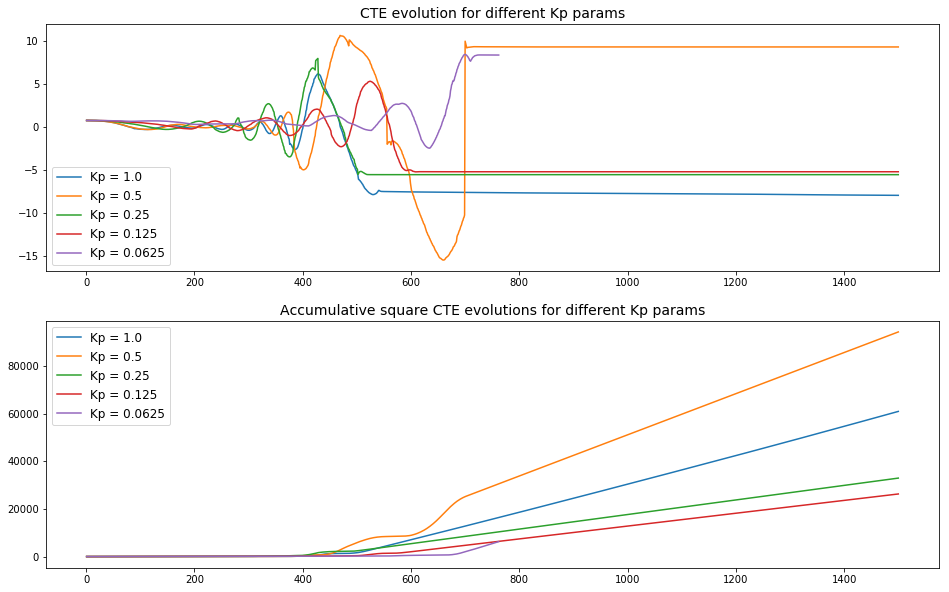

In [2]:
#input file fields as they are saved into the UKF output file
fig, ax = plt.subplots(2,1, figsize=(16,10))
ax1 = ax[0]
ax2 = ax[1]
time_from = 0
time_to = 1500

my_cols=['timestep','Kp','Ki', 'Kd', 'cte',
         'total_error','steering','throttle','speed','distance']

for one_try, name in zip(['1-0-0', '05-0-0', '025-0-0', '0125-0-0', '00625-0-0'],
                         ['Kp = 1.0', 'Kp = 0.5', 'Kp = 0.25', 'Kp = 0.125', 'Kp = 0.0625']):
    
    filename = 'data_record'
    file = filename + one_try + '.txt'

    with open('build/'+file) as f:
        table_pid_output = pd.read_table(f, sep='\t', header=0,
                                         names=my_cols, lineterminator='\n')

    ax1.plot(table_pid_output['timestep'][time_from:time_to],
            table_pid_output['cte'][time_from:time_to], label=name)

    square_values = table_pid_output['cte']**2    

    ax2.plot(table_pid_output['timestep'][time_from:time_to],
            square_values[time_from:time_to].cumsum(), label=name)

ax1.set_title('CTE evolution for different Kp params', fontsize =14)
ax1.legend(fontsize =12)
ax2.set_title('Accumulative square CTE evolutions for different Kp params', fontsize =14)
ax2.legend(fontsize =12)

plt.show()

fig.savefig('report_images/'+'Kp-params')

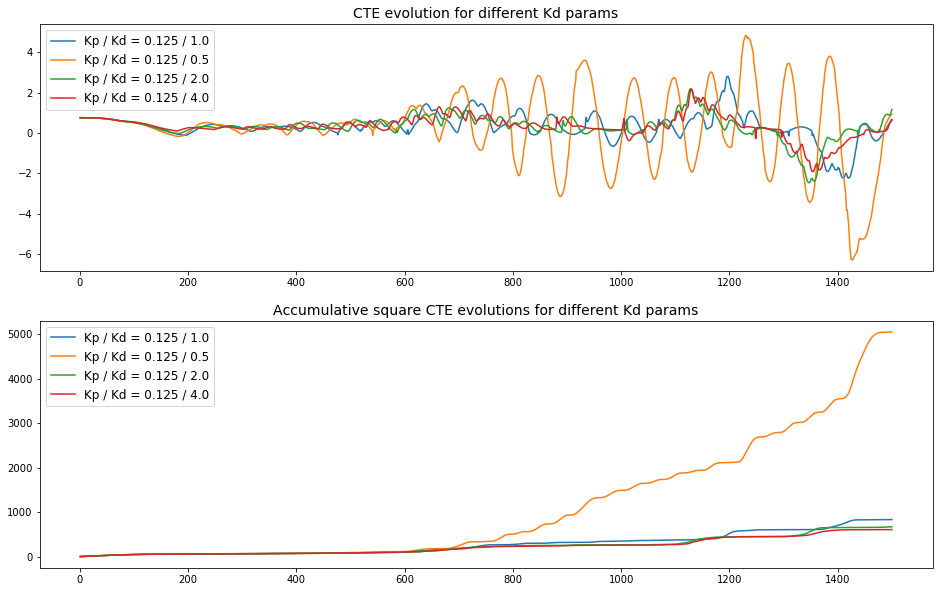

In [3]:
fig, ax = plt.subplots(2,1, figsize=(16,10))
ax1 = ax[0]
ax2 = ax[1]
time_from = 0
time_to = 1500

my_cols=['timestep','Kp','Ki', 'Kd', 'cte',
         'total_error','steering','throttle','speed','distance']

for one_try, name in zip(['0125-0-1', '0125-0-05', '0125-0-2', '0125-0-4'],
                         ['Kp / Kd = 0.125 / 1.0', 'Kp / Kd = 0.125 / 0.5',
                          'Kp / Kd = 0.125 / 2.0', 'Kp / Kd = 0.125 / 4.0']):
    
    filename = 'data_record'
    file = filename + one_try + '.txt'

    with open('build/'+file) as f:
        table_pid_output = pd.read_table(f, sep='\t', header=0,
                                         names=my_cols, lineterminator='\n')

    ax1.plot(table_pid_output['timestep'][time_from:time_to],
            table_pid_output['cte'][time_from:time_to], label=name)

    square_values = table_pid_output['cte']**2    

    ax2.plot(table_pid_output['timestep'][time_from:time_to],
            square_values[time_from:time_to].cumsum(), label=name)

ax1.set_title('CTE evolution for different Kd params', fontsize =14)
ax1.legend(fontsize =12)
ax2.set_title('Accumulative square CTE evolutions for different Kd params', fontsize =14)
ax2.legend(fontsize =12)

plt.show()

fig.savefig('report_images/'+'Kd-params')

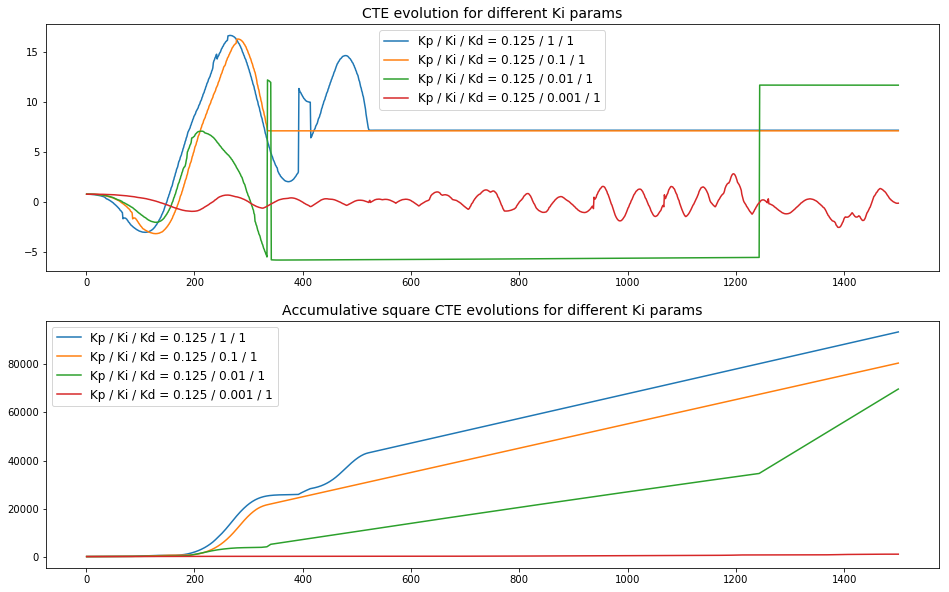

In [4]:
fig, ax = plt.subplots(2,1, figsize=(16,10))
ax1 = ax[0]
ax2 = ax[1]
time_from = 0
time_to = 1500

my_cols=['timestep','Kp','Ki', 'Kd', 'cte',
         'total_error','steering','throttle','speed','distance']

for one_try, name in zip(['0125-1-1', '0125-01-1', '0125-001-1', '0125-0001-1'],
                         ['Kp / Ki / Kd = 0.125 / 1 / 1', 'Kp / Ki / Kd = 0.125 / 0.1 / 1', 
                          'Kp / Ki / Kd = 0.125 / 0.01 / 1', 'Kp / Ki / Kd = 0.125 / 0.001 / 1']):
    
    filename = 'data_record'
    file = filename + one_try + '.txt'

    with open('build/'+file) as f:
        table_pid_output = pd.read_table(f, sep='\t', header=0,
                                         names=my_cols, lineterminator='\n')
    ax1.plot(table_pid_output['timestep'][time_from:time_to],
            table_pid_output['cte'][time_from:time_to],
            label=name)

    square_values = table_pid_output['cte']**2    

    ax2.plot(table_pid_output['timestep'][time_from:time_to],
            square_values[time_from:time_to].cumsum(), label=name)    
    
ax1.set_title('CTE evolution for different Ki params', fontsize =14)
ax1.legend(fontsize =12)
ax2.set_title('Accumulative square CTE evolutions for different Ki params', fontsize =14)
ax2.legend(fontsize =12)

plt.show()

fig.savefig('report_images/'+'Ki-params')

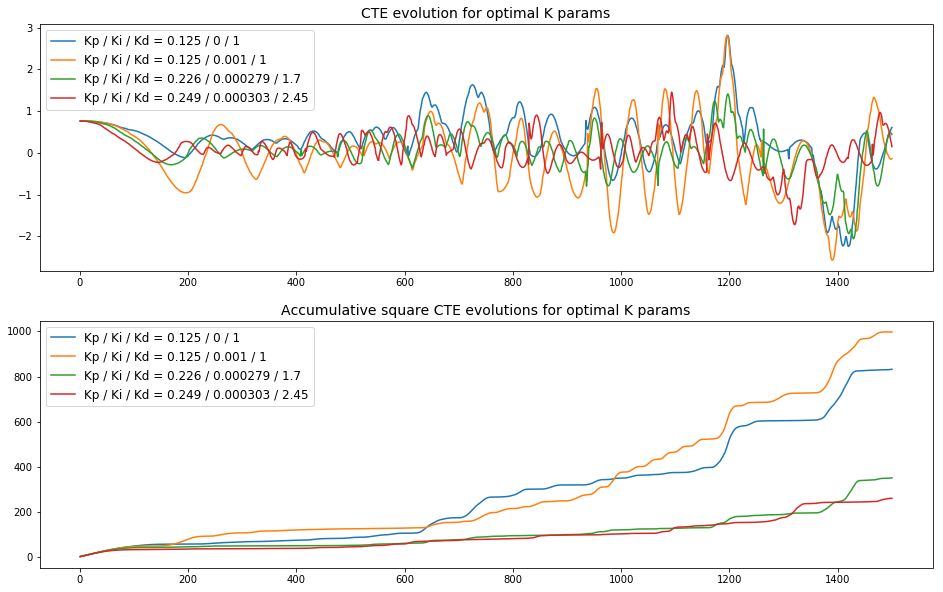

In [5]:
fig, ax = plt.subplots(2,1, figsize=(16,10))
ax1 = ax[0]
ax2 = ax[1]
time_from = 0
time_to = 1500

my_cols=['timestep','Kp','Ki', 'Kd', 'cte',
         'total_error','steering','throttle','speed','distance']

for one_try, name in zip(['0125-0-1', '0125-0001-1', 'optimal', 'optimal2'],
                         ['Kp / Ki / Kd = 0.125 / 0 / 1',
                          'Kp / Ki / Kd = 0.125 / 0.001 / 1',
                          'Kp / Ki / Kd = 0.226 / 0.000279 / 1.7',
                          'Kp / Ki / Kd = 0.249 / 0.000303 / 2.45']):
    
    filename = 'data_record'
    file = filename + one_try + '.txt'

    with open('build/'+file) as f:
        table_pid_output = pd.read_table(f, sep='\t', header=0,
                                         names=my_cols, lineterminator='\n')

    ax1.plot(table_pid_output['timestep'][time_from:time_to],
            table_pid_output['cte'][time_from:time_to], label=name)

    square_values = table_pid_output['cte']**2    

    ax2.plot(table_pid_output['timestep'][time_from:time_to],
            square_values[time_from:time_to].cumsum(), label=name)

ax1.set_title('CTE evolution for optimal K params', fontsize =14)
ax1.legend(fontsize =12)
ax2.set_title('Accumulative square CTE evolutions for optimal K params', fontsize =14)
ax2.legend(fontsize =12)

plt.show()

fig.savefig('report_images/'+'optimal-params')

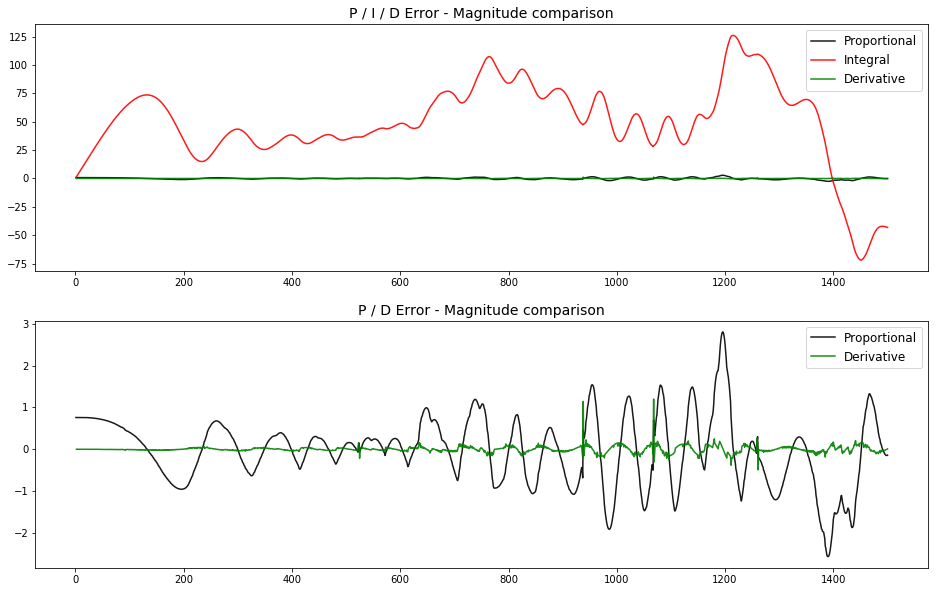

In [6]:
filename = 'data_record'
file = filename + '0125-0001-1' + '.txt'

my_cols=['timestep','Kp','Ki', 'Kd', 'cte',
         'total_error','steering','throttle','speed','distance']

with open('build/'+file) as f:
    table_pid_output = pd.read_table(f, sep='\t', header=0, names=my_cols, lineterminator='\n')

fig, ax = plt.subplots(2,1, figsize=(16,10))
ax1 = ax[0]
ax2 = ax[1]
ax1.plot(table_pid_output['timestep'], table_pid_output['cte'], alpha=0.9, c = 'black', label='Proportional')
ax1.plot(table_pid_output['timestep'], table_pid_output['cte'].cumsum(), alpha=0.9, c = 'red', label='Integral')
ax1.plot(table_pid_output['timestep'], table_pid_output['cte'].diff(), alpha=0.9, c = 'green', label='Derivative')

ax1.set_title('P / I / D Error - Magnitude comparison', fontsize =14)
ax1.legend(fontsize =12) #, loc = 'lower right')

ax2.plot(table_pid_output['timestep'], table_pid_output['cte'], alpha=0.9, c = 'black', label='Proportional')
ax2.plot(table_pid_output['timestep'], table_pid_output['cte'].diff(), alpha=0.9, c = 'green', label='Derivative')

ax2.set_title('P / D Error - Magnitude comparison', fontsize =14)
ax2.legend(fontsize =12) #, loc = 'lower right')

plt.show()

fig.savefig('report_images/'+'PID-magnitude-comparison')